In [3]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
grammar="""
sentence = adj noun verb adj noun2 | adj* noun
adj*=null|adj adj*
adj =adj_single 和 |adj_single 的 | null
adj_single = 漂亮 | 蓝色 | 好看
adv =安静地 |静静地
noun =猫 |女人 |男人
verb = adv 看着 | adv 坐着
noun2 = 桌子 | 皮球
"""

In [14]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stm, expr = line.split(split)
        grammar_pattern[stm.strip()]=[e.split() for e in expr.split('|')]
    return grammar_pattern

In [15]:
gram_pattern = build_grammar(grammar)

In [16]:
gram_pattern

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2'], ['adj*', 'noun']],
 'adj*': [['null'], ['adj', 'adj*']],
 'adj': [['adj_single', '和'], ['adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [17]:
def generate(gram_p, target):
    if target not in gram_p: return target
    expr= random.choice(gram_p[target])
    tokens= [generate(gram_p, e) for e in expr]
    #return tokens
    #tokens=[e for e in expr]
    #print(tokens)
    return ''.join(t for t in tokens if t!='null')

In [18]:
gram_pattern['adj']

[['adj_single', '和'], ['adj_single', '的'], ['null']]

In [19]:
generate(gram_pattern,'adj')

'蓝色和'

In [20]:
generate(gram_pattern,'sentence')

'漂亮的漂亮的女人'

In [21]:
generate(gram_pattern, 'adj*')

''

In [22]:
def Generate(Sentence):
    return generate(gram_pattern,Sentence)

In [23]:
Generate('sentence')

'好看和女人'

A simpler Solution 

In [26]:
def adj(): return random.choice('漂亮 |蓝色  |好看 '.split('|'))

def noun():return random.choice('猫| 女人 | 男人'.split('|'))

def verb():return random.choice('看着 | 坐着'.split('|'))

def nounend():return random.choice('桌子 | 皮球'.split('|'))

#two layers of join is for vanish blank contact
def sentence():return ''.join(''.join([adj(),noun(),verb(),nounend()]).split())


In [27]:
sentence()

'漂亮女人坐着桌子'

###DFS

In [135]:
graph={
    'A':'B B B C',
    'B':'A C',
    'C':'A B D E H',
    'D':'C',
    'E':'C F',
    'F':'E G',
    'G':'F',
    'H':'C'
}


In [136]:
#remove repeat
for k in graph:
    a=set(graph[k].split())
    li=[]
    for i in a:
        li.append(i)
    li.sort()
    graph[k]=li

In [137]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'C'],
 'C': ['A', 'B', 'D', 'E', 'H'],
 'D': ['C'],
 'E': ['C', 'F'],
 'F': ['E', 'G'],
 'G': ['F'],
 'H': ['C']}

In [138]:
for elem in set('2, 3, 4, 5, 6, 7, 1000, 50, 无形'.replace(',','').split()):
    print(elem)

7
6
5
3
50
1000
4
2
无形


In [139]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'C'],
 'C': ['A', 'B', 'D', 'E', 'H'],
 'D': ['C'],
 'E': ['C', 'F'],
 'F': ['E', 'G'],
 'G': ['F'],
 'H': ['C']}

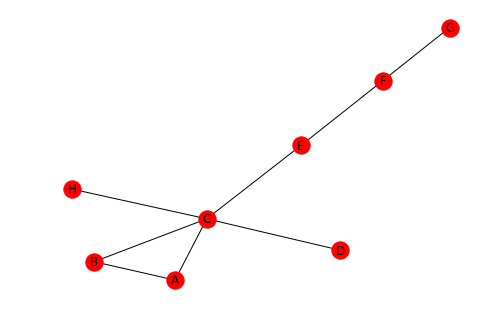

In [168]:
Graph =networkx.Graph(graph)
networkx.draw(Graph,with_labels=True)

##Breadth First Search

In [141]:
graph['B']

['A', 'C']

In [142]:
for e in graph['C']:
    print(e)

A
B
D
E
H


In [143]:
type(graph['A'])

list

In [144]:
A=['C','B','D','D']
A.pop(0)
#here list+=set is ok, A=A+graph['B'] will report wrong
A+=graph['B']
A

['B', 'D', 'D', 'A', 'C']

In [145]:
['C','B','D','E'].pop(0)

'C'

In [169]:
seen=set()
need_visited =['A']
while need_visited:
    #print('Before pop:',need_visited)
    node = need_visited.pop(0)
    if node in seen:
        print('{} has been seen'.format(node))
        continue
    print('  I am looking at: {}'.format(node))
    #need_visited = graph[node] + need_visited
    need_visited += graph[node]
    #print('After pop:',need_visited)
    seen.add(node)


  I am looking at: A
  I am looking at: B
  I am looking at: C
A has been seen
C has been seen
A has been seen
B has been seen
  I am looking at: D
  I am looking at: E
  I am looking at: H
C has been seen
C has been seen
  I am looking at: F
C has been seen
E has been seen
  I am looking at: G
F has been seen


In [185]:
def printAllPath():
    seen=set()
    need_visited=['A']
    pathes=[]
    
    while need_visited:
        viewpoint=need_visited.pop(0)
        if viewpoint in seen: continue
        if not pathes:
            pathes.append([viewpoint])
        else:
            for i in pathes:
                for m in graph[viewpoint]:
                    i.append(m)
        need_visited+=graph[viewpoint]
        seen.add(viewpoint)
    return pathes
        

##Depth First Search

In [186]:
printAllPath()

[['A', 'A', 'C', 'A', 'B', 'D', 'E', 'H', 'C', 'C', 'F', 'C', 'E', 'G', 'F']]

In [151]:
graph_long={
    '1':'2 7',
    '2':'3',
    '3':'4',
    '4':'5',
    '5':'6 10',
    '7':'8',
    '6':'5',
    '8':'9',
    '9':'10',
    '10':'5 11',
    '11':'12',
    '12':'11',
}

In [152]:
for k in graph_long:
    graph_long[k]=graph_long[k].split()

In [153]:
graph_long

{'1': ['2', '7'],
 '2': ['3'],
 '3': ['4'],
 '4': ['5'],
 '5': ['6', '10'],
 '7': ['8'],
 '6': ['5'],
 '8': ['9'],
 '9': ['10'],
 '10': ['5', '11'],
 '11': ['12'],
 '12': ['11']}

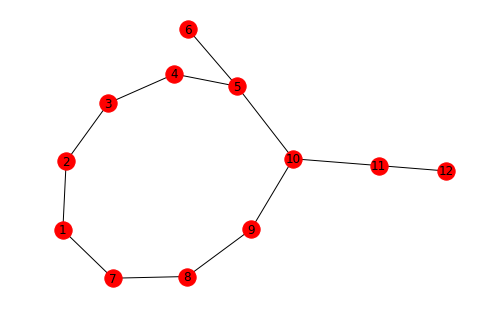

In [154]:
Graph_long=networkx.Graph(graph_long)
networkx.draw(Graph_long,with_labels=True)

In [155]:
def search(graph, contact_func):
    seen=set()
    need_visited=['1']
    
    while need_visited:
        node = need_visited.pop(0)
        if node in seen:
            print('{} has been seen'.format(node))
            continue
        print('I am looking {}'.format(node))
        seen.add(node)
        new_discovered=graph[node]
        need_visited=contact_func(new_discovered,need_visited)
    
        

In [156]:
def treat_new_discover_more_important(new,old):
    return new+old

def treat_old_discovered_more_important(new,old):
    return old+new

In [49]:
search(graph_long,treat_new_discover_more_important)

I am looking 1
I am looking 2
I am looking 3
I am looking 4
I am looking 5
I am looking 6
5 has been seen
I am looking 10
5 has been seen
I am looking 11
I am looking 12
11 has been seen
I am looking 7
I am looking 8
I am looking 9
10 has been seen


In [50]:
search(graph_long, treat_old_discovered_more_important)

I am looking 1
I am looking 2
I am looking 7
I am looking 3
I am looking 8
I am looking 4
I am looking 9
I am looking 5
I am looking 10
I am looking 6
10 has been seen
5 has been seen
I am looking 11
5 has been seen
I am looking 12
11 has been seen


In [51]:
from functools import partial

In [52]:
dfs=partial(search, contact_func=treat_new_discover_more_important)
bfs=partial(search, contact_func=treat_old_discovered_more_important)

In [53]:
dfs(graph_long)

I am looking 1
I am looking 2
I am looking 3
I am looking 4
I am looking 5
I am looking 6
5 has been seen
I am looking 10
5 has been seen
I am looking 11
I am looking 12
11 has been seen
I am looking 7
I am looking 8
I am looking 9
10 has been seen


In [54]:
bfs(graph_long)

I am looking 1
I am looking 2
I am looking 7
I am looking 3
I am looking 8
I am looking 4
I am looking 9
I am looking 5
I am looking 10
I am looking 6
10 has been seen
5 has been seen
I am looking 11
5 has been seen
I am looking 12
11 has been seen


In [140]:
BJ='BeiJing'
SZ='ShenZhen'
GZ='GuangZhou'
WH='WuHan'
HLJ='HeiLongJiang'
NY='New York City'
CM='ChiangMai'
SG='Singapore'
RC='RuiChang'

In [141]:
air_route={
    BJ: {SZ,GZ,WH,HLJ,NY},
    GZ: {WH,BJ,CM,SG},
    SZ: {BJ,SG,WH},
    WH: {BJ,GZ,SZ},
    HLJ: {BJ},
    CM: {GZ},
    NY: {BJ},
    RC: {},
}

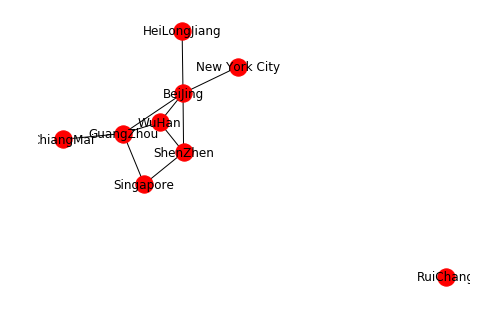

In [150]:
air_route=networkx.Graph(air_route)
networkx.draw(air_route,with_labels=True)

In [173]:
search_all_route(air_route,BJ,SZ)

[['BeiJing', 'ShenZhen'],
 ['BeiJing', 'WuHan', 'ShenZhen'],
 ['BeiJing', 'GuangZhou', 'Singapore', 'ShenZhen'],
 ['BeiJing', 'GuangZhou', 'WuHan', 'ShenZhen'],
 ['BeiJing', 'WuHan', 'GuangZhou', 'Singapore', 'ShenZhen']]

In [164]:
def search_destination(graph, start, dest):
    pathes=[[start]]
    seen=set()
    chosen_pathes=[]
    while pathes:
        path=pathes.pop(0)
        front=path[-1]
        #print(start, front)
        #if front in seen: continue
        #if front in dest: continue
        #print(type(graph[front]))
        
        for city in graph[front]:
            #if city in seen: continue
            if front in seen: continue
            #print(city, front, path)
            new_path=path+[city]
            #print(new_path)
            #if city==dest: continue
            #else:
            #   print(new_path)
            pathes.append(new_path)
            #pathes=new_path+pathes
            if city==dest:chosen_pathes.append(new_path)
        seen.add(front)
        #if front in start: continue
    return chosen_pathes
    

In [165]:
search_destination(air_route,BJ,SG)

[['BeiJing', 'GuangZhou', 'Singapore'], ['BeiJing', 'ShenZhen', 'Singapore']]

In [180]:
search_destination(air_route, HLJ,NY)

[['HeiLongJiang', 'BeiJing', 'New York City']]

In [157]:
A=[['Shanghai']]
C=A.pop(0)
C


['Shanghai']

In [177]:
def search_all_route(graph, start, dest):
    pathes=[[start]]
    routes=[] 
    while pathes:
        path=pathes.pop(0)
        front=path[-1]
        
        for city in graph[front]:
            if city in path: continue
            new_path=path+[city]
            pathes.append(new_path)
            # if find the first path, return immediately
            #if city==dest:return new_path
            if city==dest:routes.append(new_path)
    return routes

In [170]:
def draw_route(cities):
    for i in cities:
        print('✈️ --->'.join(i))

In [159]:
draw_route(search_destination(air_route,BJ,SG))

BeiJing✈️ --->GuangZhou✈️ --->Singapore
BeiJing✈️ --->ShenZhen✈️ --->Singapore


In [160]:
draw_route(search_destination(air_route,BJ,NY))

BeiJing✈️ --->New York City
